In [1]:
% matplotlib inline
from core import dyna_main
import matplotlib.pyplot as plt
from utils import utils

In [2]:
import numpy as np
from matplotlib import animation, rc
from IPython.display import HTML

## Config Parameters

In [3]:
def init_default_config():
    config = {'arch' : 'dyna_q',
              'terminal_step' : 6000,
              'switch_maze_at_step' : 3000,
              'maze_type' : 'blocking',
              'maze_params' : {
                  'row' : 6,
                  'col' : 9,
                  'start_row' : 6,
                  'start_col' : 4
              },
              'policy' : 'epsilon_greedy',
              'policy_params' : {
                  'epsilon' : 0.1,
                  'seed' : 24
              },
              'learning_alg' : 'q_learning',
              'learning_alg_params' : {
                  'alpha' : 0.1,
                  'gamma' : 0.95,
                  'seed' : 42
              },
              'model' : 'deterministic_no_prior',
              'model_params' : {
                  'sim_epoch' : 500
              },
              'planner_params' : {
                  'kappa' : 0.01
              }
             }
    return config

## Blocking Maze

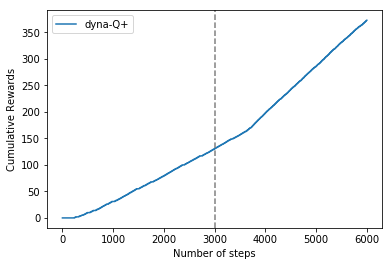

In [4]:
# # Dyna-Q
# config = init_default_config()
# config['arch'] = 'dyna_q'
# config['maze_type'] = 'shortcut'
# result_q = dyna_main.run_experiment(config)

# cum_reward = 0
# cum_reward_lst_q = []
# for step in range(len(result_q)):
#     cum_reward += result_q[step]['experience']['R']
#     cum_reward_lst_q.append(cum_reward)

# Dyna-Q+
config = init_default_config()
config['arch'] = 'dyna_q_plus'
config['maze_type'] = 'shortcut'
result_qplus = dyna_main.run_experiment(config)

cum_reward = 0
cum_reward_lst_qplus = []
for step in range(len(result_qplus)):
    cum_reward += result_qplus[step]['experience']['R']
    cum_reward_lst_qplus.append(cum_reward)

# Plotting cummulative rewards for the two algorithms
plt.ylabel('Cumulative Rewards')
plt.xlabel('Number of steps')
# plt.plot(cum_reward_lst_q, label='dyna-Q')
plt.plot(cum_reward_lst_qplus, label='dyna-Q+')
plt.axvline(x=config['switch_maze_at_step'], color='grey', linestyle='--')
plt.legend()

# Animation

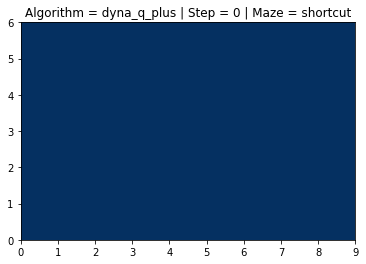

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

game_qplus = utils.GameAnimator(figure=fig, axes=ax, result=result_qplus)
anim_qplus = game_qplus.animate(start_step = 0, stop_step = 5999)

In [6]:
HTML(anim_qplus.to_html5_video())